## 数据处理

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

std = StandardScaler()

data = pd.DataFrame(np.load("dataset.npy",allow_pickle= True))
data.columns = ['feature', 'label']
X = np.array(data.feature.tolist())
std.fit(X)
Y = np.array(data.label.tolist())

## 绘制分布柱状图

['air_conditioner' 'car_horn' 'children_playing' 'dog_bark' 'drilling'
 'engine_idling' 'gun_shot' 'jackhammer' 'siren' 'street_music']


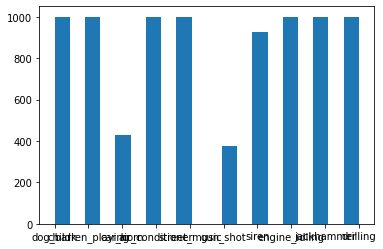

In [2]:
%matplotlib inline
plt.hist(Y, bins = 20);
print(np.unique(Y))

In [3]:
X[0].shape

(40,)

In [4]:
# X.shape,Y.shape,X[0].reshape(1,X[0].shape[0]).shape

In [5]:
from sklearn.model_selection import train_test_split
X,val_x,y,val_y = train_test_split(X,Y,test_size=0.3)
lb = LabelEncoder()

from keras.utils import np_utils

y_en = np_utils.to_categorical(lb.fit_transform(y))
val_y_en = np_utils.to_categorical(lb.fit_transform(val_y))

In [6]:
def acc(y_test,prediction):

    ### PRINTING ACCURACY OF PREDICTION
    ### RECALL
    ### PRECISION
    ### CLASIFICATION REPORT
    ### CONFUSION MATRIX
    cm = confusion_matrix(y_test, prediction)
    recall = np.diag(cm) / np.sum(cm, axis = 1)
    precision = np.diag(cm) / np.sum(cm, axis = 0)
    
    print ('Recall:', recall)
    print ('Precision:', precision)
    print ('\n clasification report:\n', classification_report(y_test,prediction))
    print ('\n confussion matrix:\n',confusion_matrix(y_test, prediction))
    
    ax = sns.heatmap(confusion_matrix(y_test, prediction),linewidths= 0.5,cmap="YlGnBu")

## 网络构建

In [7]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from keras.utils import np_utils
from sklearn import metrics 
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from keras.callbacks import LearningRateScheduler



num_labels = y_en.shape[1]
nets = 5

model = [0] *nets

for net in range(nets):
    model[net] = Sequential()

    model[net].add(Dense(512, input_shape=(40,)))
    model[net].add(Activation('relu'))
    model[net].add(Dropout(0.45))


    model[net].add(Dense(256))
    model[net].add(Activation('relu'))
    model[net].add(Dropout(0.45))


    model[net].add(Dense(num_labels))
    model[net].add(Activation('softmax'))

    model[net].compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='RMSprop')

In [23]:
# for i in range(0,5):
#     model[i].summary()
model[-1].summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 512)               20992     
                                                                 
 activation_12 (Activation)  (None, 512)               0         
                                                                 
 dropout_8 (Dropout)         (None, 512)               0         
                                                                 
 dense_13 (Dense)            (None, 256)               131328    
                                                                 
 activation_13 (Activation)  (None, 256)               0         
                                                                 
 dropout_9 (Dropout)         (None, 256)               0         
                                                                 
 dense_14 (Dense)            (None, 10)               

## 模型训练

In [9]:
history = [0] * nets
epochs = 132
for j in range(nets):
    X_train2, X_val2, Y_train2, Y_val2 = X,val_x, y_en, val_y_en
    history[j] = model[j].fit(X,Y_train2, batch_size=256,
        epochs = epochs,   
        validation_data = (X_val2,Y_val2),  verbose=0)
    print("CNN {0:d}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
        j+1,epochs,max(history[j].history['accuracy']),max(history[j].history['val_accuracy']) ))

CNN 1: Epochs=132, Train accuracy=0.92343, Validation accuracy=0.92099
CNN 2: Epochs=132, Train accuracy=0.92834, Validation accuracy=0.91870
CNN 3: Epochs=132, Train accuracy=0.92654, Validation accuracy=0.91985
CNN 4: Epochs=132, Train accuracy=0.92687, Validation accuracy=0.91603
CNN 5: Epochs=132, Train accuracy=0.92768, Validation accuracy=0.92252


## 绘制损失和acc图像

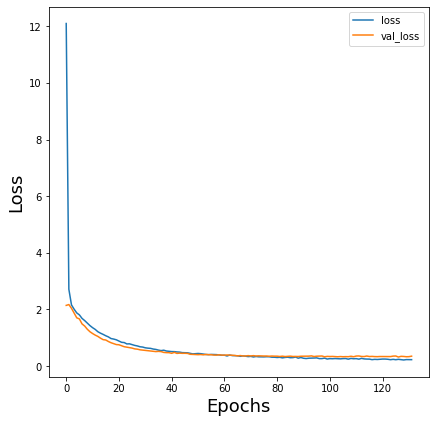

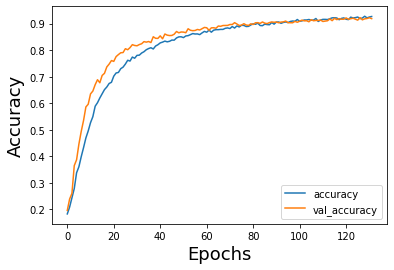

In [10]:
net = -1
name_title = ['Loss','Accuracy']
fig=plt.figure(figsize=(64,64))
for i in range(0,2):
    ax=fig.add_subplot(8,8,i+1)
    plt.plot(history[net].history[list(history[net].history.keys())[i]], label = list(history[net].history.keys())[i] )
    plt.plot(history[net].history[list(history[net].history.keys())[i+2]],label = list(history[net].history.keys())[i+2] )
    plt.xlabel('Epochs', fontsize=18)
    plt.ylabel(name_title[i], fontsize=18)
    plt.legend()
    plt.show()

## 多个CNN加和

Recall: [0.97966102 0.90551181 0.92532468 0.82075472 0.94276094 0.96518987
 0.80733945 0.98148148 0.95373665 0.89297659]
Precision: [0.96333333 0.98290598 0.81896552 0.91258741 0.98245614 0.95611285
 0.92631579 0.96363636 0.94699647 0.85576923]

 clasification report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       295
           1       0.98      0.91      0.94       127
           2       0.82      0.93      0.87       308
           3       0.91      0.82      0.86       318
           4       0.98      0.94      0.96       297
           5       0.96      0.97      0.96       316
           6       0.93      0.81      0.86       109
           7       0.96      0.98      0.97       270
           8       0.95      0.95      0.95       281
           9       0.86      0.89      0.87       299

    accuracy                           0.92      2620
   macro avg       0.93      0.92      0.92      2620
weighted avg       0.93   

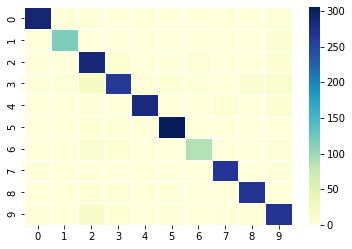

In [21]:
results = np.zeros((val_x.shape[0],10)) 
for j in range(nets):
    results = results  + model[j].predict(val_x) #加和运算
results = np.argmax(results,axis = 1)
val_y_n = np.argmax(val_y_en,axis = 1)
acc(val_y_n,results)

In [ ]:
results.shape ## 零矩阵

(2620, 10)

## 单个CNN

Recall: [0.96949153 0.91338583 0.92532468 0.84591195 0.91582492 0.96835443
 0.80733945 0.98518519 0.95373665 0.83946488]
Precision: [0.96621622 0.99145299 0.77868852 0.89368771 0.97142857 0.95924765
 0.87128713 0.94661922 0.94035088 0.91605839]

 clasification report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       295
           1       0.99      0.91      0.95       127
           2       0.78      0.93      0.85       308
           3       0.89      0.85      0.87       318
           4       0.97      0.92      0.94       297
           5       0.96      0.97      0.96       316
           6       0.87      0.81      0.84       109
           7       0.95      0.99      0.97       270
           8       0.94      0.95      0.95       281
           9       0.92      0.84      0.88       299

    accuracy                           0.92      2620
   macro avg       0.92      0.91      0.92      2620
weighted avg       0.92   

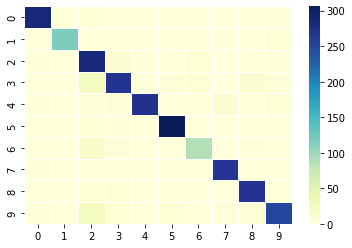

In [24]:
results = np.zeros((val_x.shape[0],10)) 
results = results  + model[4].predict(val_x) #加和运算
results = np.argmax(results,axis = 1)
val_y_n = np.argmax(val_y_en,axis = 1)
acc(val_y_n,results)